
# Digit Classification with KNN


In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [ ]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
# Setting as_frame parameter to False to return an array as opposed to a dataframe: 
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False, as_frame=False) 

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y. NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


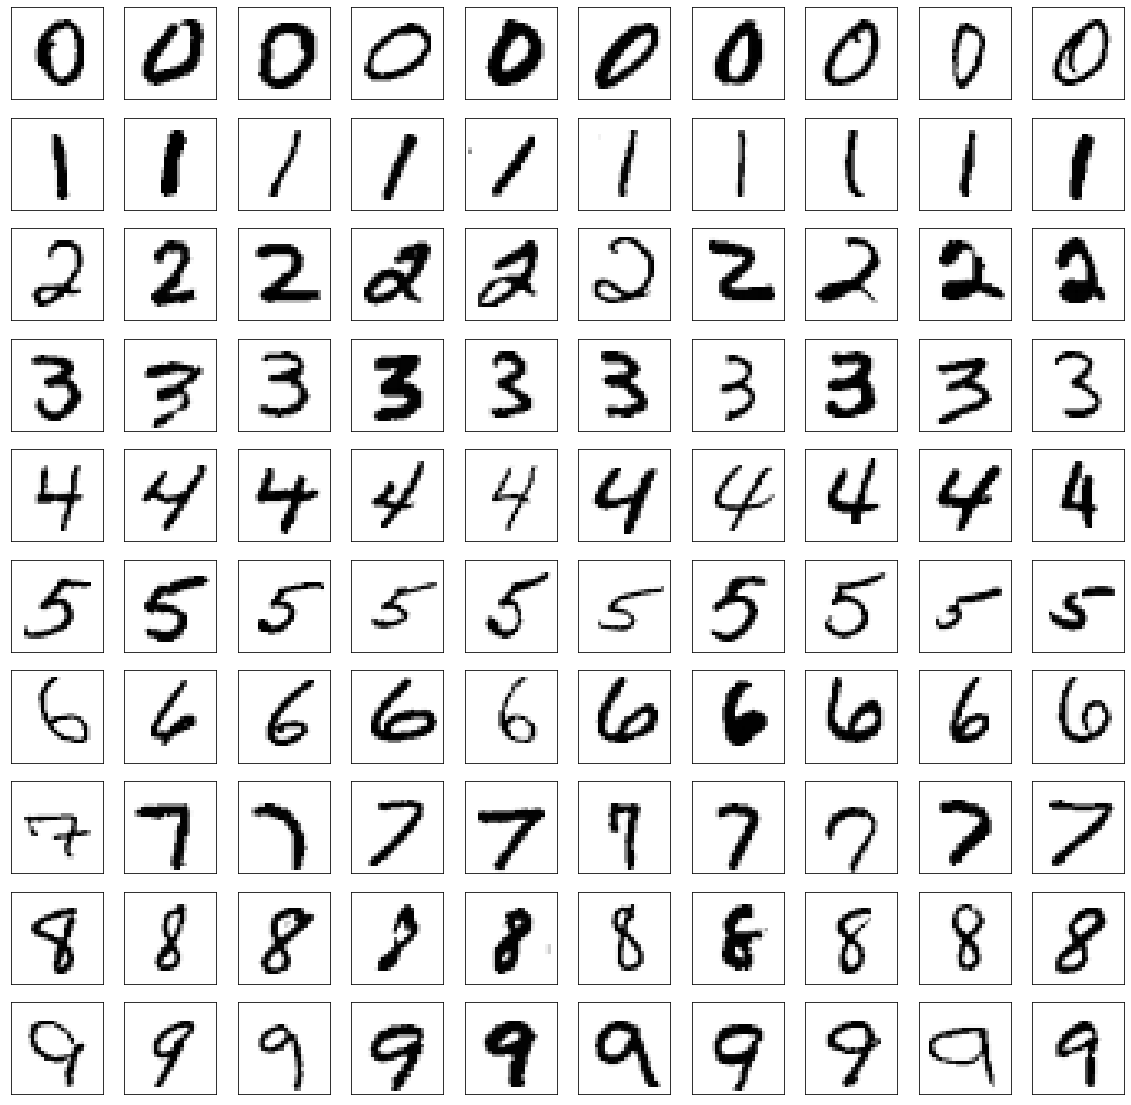

In [ ]:
def Q1(num_examples=10):
  ### STUDENT START ### 
  '''Takes in the number of examples and visualizes a 10x10 grid with 10 examples of each digit''' 
  # Creating subplots with the number of rows equal to the number of unique elements in Y and the number of columns equal to 10, with a set figure size of 20x20:
  fig, axs = plt.subplots(len(np.unique(Y)), 10, figsize=(20,20)) 

  # Iterating through each element in the unique set of Y values (rows): 
  for i, x in enumerate(np.unique(Y)): 
    # For each number up to the maximum value of 10 (columns): 
    for j in range(10): 
      # Rendering a matrix after reshaping the 1D feature vectors into a 2D matrix and making it black and white: 
      axs[i, j].imshow(X[Y==x][j].reshape((int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))), cmap='Greys') 
      # Removing ticks and associated numerical values from each subplot: 
      axs[i, j].set_xticks([], []) 
      axs[i, j].set_yticks([], []) 
      # Inspiration Source: https://stackoverflow.com/questions/61962591/visualize-10x10-grid-of-each-digit-using-mnist-samples
  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [ ]:
def Q2(k_values):
### STUDENT START ###
  '''Takes in a list of potential values for k and produces k-Nearest Neighbors models, while printing the accuracy of each model and showing the precision, recall, and F1 for each label in the 1-Nearest Neighbor model'''
  # Iterating through each possible value of k in the list: 
  for k in k_values: 
    # Initializing a K-nearest neighbor model with the value for k using KNeighborsClassifier:
    model = KNeighborsClassifier(n_neighbors = k)
    # Fitting the model on the mini train data set: 
    model.fit(mini_train_data, mini_train_labels)
    # Evaluating the performance of the model on the dev set: 
    predicted_labels = model.predict(dev_data)

    # If the value for k is 1: 
    if k == 1:
      # Printing out the classification report:
      print('---------- Classification Report for k = ' + str(1)+ ' ----------')
      # Using classification_report to get precision, recall, and F1 results for the model where k = 1: 
      print(classification_report(dev_labels, predicted_labels))
    # Printing out the accuracy of each of the models using accuracy_score: 
    print("Accuracy of Model k = " + str(k) + " (in %) : " + str(np.multiply(accuracy_score(dev_labels, predicted_labels, normalize=True), 100)))
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

---------- Classification Report for k = 1 ----------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy of Model k = 1 (in %) : 88.4
Accuracy of Model k = 3 (in %) : 87.6
Accuracy of Model k = 5 (in %) : 88.2
Accuracy of Model k = 7 (in %) : 87.7
Accuracy of Model k = 9 (in %) : 87

Answer to part 4: The digit that is the most difficult for the 1-Nearest Neighbor model to classify correctly is 8 as it has the lowest f1-score. This indicates that 8 has the lowest mean of in terms of digit performance based on the precision and recall. Although precision is lowest for 9, recall is lowest for 8 and 8 has the lower F1-score (which accounts for both precision and recall).

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

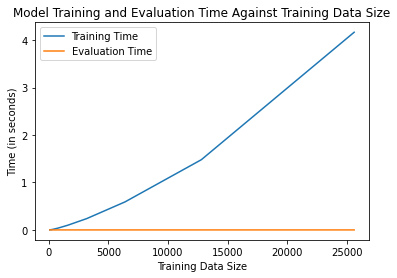

,Train Size,Time Needed for Training,Time Needed for Calculating Accuracy,Accuracy
0,100,0.002503,0.000958,0.702
1,200,0.005931,0.000975,0.791
2,400,0.015434,0.000956,0.811
3,800,0.039701,0.000965,0.866
4,1600,0.099138,0.000978,0.905
5,3200,0.240028,0.001005,0.927
6,6400,0.590897,0.000989,0.939
7,12800,1.480437,0.000958,0.952
8,25600,4.164597,0.001012,0.963


In [ ]:
def Q3(train_sizes, accuracies,  train_times, eval_times):
### STUDENT START ###
  '''Takes in train sizes, accuracies, train times, and eval times and produces 1-Nearest Neighbor models using training data of various sizes,
  evaluates & shows the accuracy achieved by each model, shows the time needed to train each model & measure the accuracy of each model, and
  plots the time needed for training as well as the time needed for calculating accuracy'''
  # For each possible training data size in the list: 
  for train_size in train_sizes:
      # Setting the new training data to a portion of the training data sliced based on the given size: 
      new_train_data, new_train_labels = X[:train_size], Y[:train_size]
      # Initializing a K-nearest neighbor model with k = 1 using KNeighborsClassifier:
      model = KNeighborsClassifier(n_neighbors = 1)

      # Calculating the start time to train the model:
      train_times_start = time.time()
      # Fitting the model on the new training data set: 
      model.fit(new_train_data, new_train_labels)
      # Calculating the end time to train the model: 
      train_times_end = time.time()
 
      # Evaluating the performance of the model on the dev set: 
      predicted_labels = model.predict(dev_data)
      
      # Using the shape of the modified training dataset in order to determine the number of examples and dimensions: 
      examples, dimensions = np.shape(new_train_data)
          
      # Calculating the start time to calculate accuracy:
      eval_times_start = time.time()
      # Finding the accuracy of each of the model using accuracy_score: 
      accuracy = accuracy_score(dev_labels, predicted_labels, normalize=True)
      # Calculating the end time to calculate accuracy: 
      eval_times_end = time.time() 

      # Setting the model's training time to the difference between the end and start time: 
      training_time = train_times_end - train_times_start
      # Setting the model's evaluation time to the difference between the end and start time: 
      evaluation_time = eval_times_end - eval_times_start
    
      # Appending each models training, evaluation, and accuracy into the lists for the corresponding values for all models collectively: 
      train_times.append(training_time)
      eval_times.append(evaluation_time)
      accuracies.append(accuracy)

  # Plotting on the same graph (as a function of training size), the time needed for training and the time needed for calculating accuracy:
  plt.plot(train_sizes, train_times, label= 'Training Time')
  plt.plot(train_sizes, eval_times, label = 'Evaluation Time')
  plt.legend()
  plt.xlabel("Training Data Size")
  plt.ylabel("Time (in seconds)")
  plt.title("Model Training and Evaluation Time Against Training Data Size")
  plt.show()

  # Setting the results equal to a dataframe with the size of the training data, the time needed for training, the time needed for calculating accuracy, and accuracy achieved, for each model:
  results = pd.DataFrame(data = {'Train Size' : train_sizes, 
              'Time Needed for Training' : train_times, 
              'Time Needed for Calculating Accuracy' : eval_times,
              'Accuracy' : accuracies})
  # Displaying the results:
  display(results)
 
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = [] 
Q3(train_sizes, accuracies, train_times, eval_times)

Answer to part 4: I observe that, when the train size increases, the time needed for training increases for the most part, which makes sense as there are more data points to fit for the model. Moreover, I notice that time needed for calculating the accuracy does not vary much based on the train size, which makes sense as the development data used is consistent as the same size for all models. Also, I see that the accuracy increases as the train size increases, which makes sense as more training examples yield a lower development error. A model might not perform well if there is high variance, leading to model overfitting, or high bias such that adding more data would not help.

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

------------- Pre Transformation -------------


R²: 0.4177006634161019




,Training Size,Model Accuracy (in %)
0,60000,87.771881
1,120000,92.051933
2,1000000,100.612037


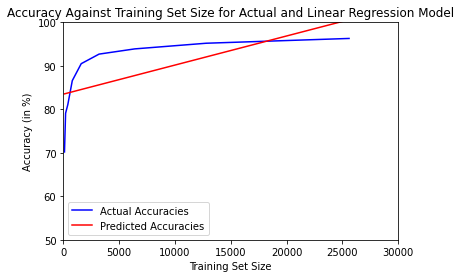



------------- Post Transformation -------------


R²: 0.8904873087263117




,Training Size,Model Accuracy (in %)
0,60000,92.454370
1,120000,92.651471
2,1000000,92.750033


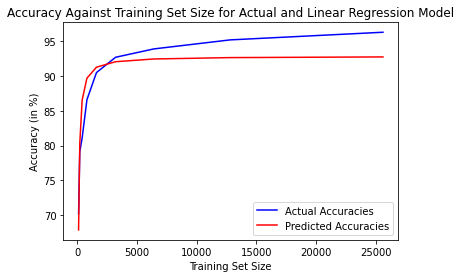

In [ ]:
def Q4(train_sizes, accuracies):
  '''Takes in the features and labels that are the output from the previous question and, based on the training size and accuracy, predict the accuracy we would get if we had larger training sizes.'''

### STUDENT START ###
  # Storing the possible training set sizes to predict accuracies for in the form of an np.array: 
  predicts = np.array([[60000], [120000], [1000000]]).reshape(-1, 1)

  print("------------- Pre Transformation -------------")
  print('\n')

  # Converting and reshaping the train sizes and accuracies to be np.arrays: 
  train_sizes = np.array(train_sizes).reshape(-1,1)
  accuracies = np.array(accuracies).reshape(-1,1) 
  
  # Initializing the linear regression model:
  lin_reg_model = LinearRegression()
  # Fitting the linear regression model with the train sizes and accuracies: 
  lin_reg_model.fit(train_sizes, accuracies)

  # Printing the R^2 value
  print(f"R\u00b2: " + str(lin_reg_model.score(train_sizes, accuracies)))
  print('\n')
  
  # Predicting the accuracies for each of the training sizes: 
  lin_reg_accuracies = lin_reg_model.predict(train_sizes)

  # Instantiating empty lists to store the sizes and model accuracies: 
  sizes = []
  model_accuracies = []
  # Printing the accuracies of the linear regression model for the set of possible training set sizes as a dataframe:
  for x, y in zip(predicts, lin_reg_accuracies[len(lin_reg_accuracies)-3:]):
    sizes.append(x[0])
    model_accuracies.append(y[0])

  results = pd.DataFrame(data={'Training Size' : sizes, 'Model Accuracy (in %)' : np.multiply(model_accuracies, 100)})
  display(results)
  print('\n')

  # Plotting on a lineplot graph the actual accuracies we obtained in the previous question and the accuracies our model predicted we would have gotten:
  plt.plot(train_sizes, np.multiply(accuracies, 100), label="Actual Accuracies", color = 'blue')
  plt.plot(train_sizes, np.multiply(lin_reg_accuracies, 100), '-r', label = "Predicted Accuracies", color = 'red')
  plt.title("Accuracy Against Training Set Size for Actual and Linear Regression Model")
  plt.xlabel("Training Set Size")
  plt.ylabel("Accuracy (in %)")
  plt.xlim(0, 30000)
  plt.ylim(50, 100)
  plt.legend()
  plt.show()
  print('\n')

  print("------------- Post Transformation -------------")
  print('\n')

  # Defining odds ratio functions: 
  odds_to_prob = lambda x: x / (1.0 + x)  # [0, inf] -> [0, 1]
  # Applying a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues:
  new_train_sizes = odds_to_prob(train_sizes)

  # Converting and reshaping the train sizes and accuracies to be np.arrays: 
  new_train_sizes = np.array(new_train_sizes).reshape(-1, 1)

  # Initializing the linear regression model:
  new_lin_reg_model = LinearRegression()
  # Fitting the linear regression model with the train sizes and accuracies: 
  new_lin_reg_model.fit(new_train_sizes, accuracies)

  # Printing the R^2 value
  print(f"R\u00b2: " + str(new_lin_reg_model.score(new_train_sizes, accuracies)))
  print('\n')
  
  # Predicting the accuracies for each of the training sizes: 
  new_lin_reg_accuracies = new_lin_reg_model.predict(new_train_sizes)

  # Instantiating empty lists to store the sizes and model accuracies: 
  new_sizes = []
  new_model_accuracies = []
  # Printing the accuracies of the linear regression model for the set of possible training set sizes as a dataframe:
  for x, y in zip(predicts, new_lin_reg_accuracies[len(new_lin_reg_accuracies)-3:]):
    new_sizes.append(x[0])
    new_model_accuracies.append(y[0])
  new_results = pd.DataFrame(data={'Training Size' : new_sizes, 'Model Accuracy (in %)' : np.multiply(new_model_accuracies, 100)})
  display(new_results)
  print('\n')

  # Plotting on a lineplot graph the actual accuracies we obtained in the previous question and the accuracies our model predicted we would have gotten:
  plt.plot(train_sizes, np.multiply(accuracies, 100), label="Actual Accuracies", color = 'blue')
  plt.plot(train_sizes, np.multiply(new_lin_reg_accuracies, 100), label = "Predicted Accuracies", color = 'red')
  plt.title("Accuracy Against Training Set Size for Actual and Linear Regression Model")
  plt.xlabel("Training Set Size")
  plt.ylabel("Accuracy (in %)")
  plt.legend()
  plt.show() 
### STUDENT END ###

Q4(train_sizes, accuracies)

Answer to part 5: It is not necessarily appropriate to use a linear regression model to predict the accuracy of a training set since the relationship between training set size and accuracy is not linear. (Instead, it appears to be logarithmic since the prediction accuracy improves when the training set size increases, but the rate of improvement wanes when the training set size increases even more.) Moreover, the R-squared value of 0.417 is too low, indicating that the regression does not fit the actual data well as about 60% of the variability in the outcome data cannot be explained by the model. 

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

The most confused digits are: 9 and 4


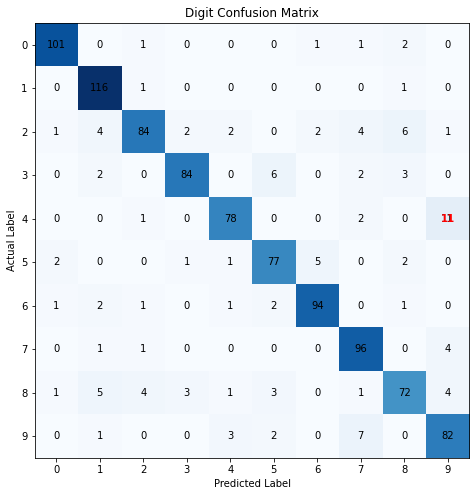

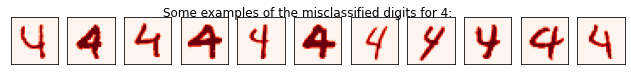

In [ ]:
def Q5():
### STUDENT START ###
  '''Produces a 1-Nearest Neighbor model, shows the confusion matrix, and shows examples of the most misclassified digits'''
  # Initializing a K-nearest neighbor model with k = 1 using KNeighborsClassifier:
  model = KNeighborsClassifier(n_neighbors=1)
  # Fitting the model on the mini training dataset:
  model.fit(mini_train_data, mini_train_labels)
  # Evaluating the performance of the model on the dev set:
  predictions = model.predict(dev_data)
  # Using confusion_matrix to produce a confusion matrix for the development data:
  confusion = confusion_matrix(dev_labels, predictions)

  # Plotting the confusion matrix with colormap of blues: 
  plt.figure(figsize=(8,8))
  plt.imshow(confusion, cmap='Blues')
  
  # Adding a title, y label, and x label: 
  plt.title("Digit Confusion Matrix")
  plt.ylabel("Actual Label")
  plt.xlabel("Predicted Label")
  plt.xticks(np.arange(10))
  plt.yticks(np.arange(10))
  
  # Setting the most confused limit to be 0 initially: 
  most_confused = 0
  # Initializing the coordinates of the most confused digits in the confusion matrix: 
  confused_cordinates = (0,0)
  
  # Setting the counter for the number of times the most confused digits had an error to 0: 
  error_count = 0
  # Iterating through the length of the confusion matrix, row-wise and column-wise:
  for i in range(np.shape(confusion)[0]):
      for j in range(np.shape(confusion)[1]):
         # Marking each confusion pair: 
          if i != j: 
            if confusion[i, j] > most_confused:
              # Determining the value of the top confusion pair: 
              most_confused = confusion[i,j]
              # Determining the coordinates of the top confusion pair: 
              confused_coordinates = i, j 
              # Incrementing the error counter: 
              error_count += 1      
          # Marking the values for each confusion pair with black text:      
          plt.text(j, i, confusion[i,j], ha="center", va="center", color="black")
  
  # Marking the value for the top confusion pair with red, bolded text: 
  plt.text(confused_coordinates[1], confused_coordinates[0], most_confused, ha="center", va="center", color="red", fontweight="extra bold")

  # Printing what the most confused digits are and which digit they are most confused with: 
  print('The most confused digits are: ' + str(confused_coordinates[1]) + ' and ' + str(confused_coordinates[0]))

  # To show examples of the misclassified digit, initializing the subplots: 
  fig, ax = plt.subplots(1, 11, figsize = (11, 1))
  # Description: 
  fig.suptitle("Some examples of the misclassified digits for 4:")
  # Setting properties: 
  plt.setp(ax, xticks=(), yticks=())
  # Creating a list of the 11 mis-represented values of 4 that appear as 9: 
  fours = np.where((predictions == str(9)) & (dev_labels ==str(4)))[0][:11]

  # Iterating through the list of the confusing values: 
  x = 0
  for i in fours: 
    # Displaying each one with similar logic as Q1():
    ax[x].imshow(np.reshape(dev_data[i], (28, 28)), cmap='Reds')
    x += 1

  # Displaying all confused 4 values: 
  plt.show()
### STUDENT END ###

Q5()


Answer to part 3: The model most often confuses 4 for 9.